In [2]:
from face_enum_graphic import FaceEnumeration
from pathlib import Path

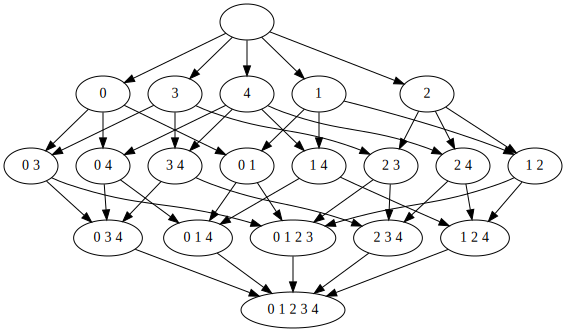

In [3]:
test_face_enum = FaceEnumeration((Path.cwd() / 'Hasse_diagram' / 'examples' / 'pyr4.txt'))
graph = test_face_enum.draw_hasse_diagram()
graph

In [6]:
import json
import numpy as np

def read_polymake_format(poly_json):
    python_format = []
    with open(poly_json) as fl:
        poly_dict = json.load(fl)

    python_format = poly_dict.get('VERTICES_IN_FACETS')
    polytope_data = (len(python_format) - 1, python_format[-1].get('cols'), poly_dict.get('CONE_DIM') - 1)
    
    return python_format[:-1], polytope_data

In [7]:
experiment_jsons = Path(Path.cwd() / 'Hasse_diagram' / 'examples' / 'polymake_examples')

simplex = Path(experiment_jsons / 'cube3.json')
lst, data = read_polymake_format(simplex)


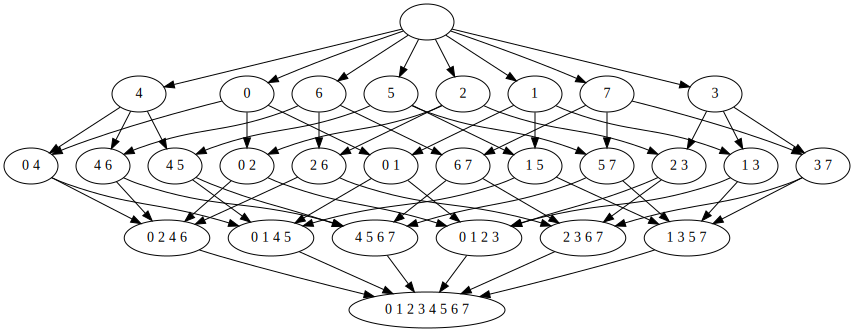

In [5]:
cube3 = FaceEnumeration(lst, data)
graph = cube3.draw_hasse_diagram()
graph

In [20]:
import matplotlib
import time

In [11]:
#cube experiment

# cube_dir = Path(experiment_jsons / 'cubes')
# fenum_cubes = []

# for cube in cube_dir.iterdir():
#     cb_im, cb_data = read_polymake_format(cube)
#     fenum_cubes.append((FaceEnumeration(cb_im, cb_data), cube.stem))

# fenum_cubes = sorted(fenum_cubes, key=lambda x : x[0].get_dim)

# cube_times = []
# for cube in fenum_cubes:
    
#     start = time.time()
#     cube[0].face_enumeration()
#     tm = time.time() - start
#     cube_times.append(tm)

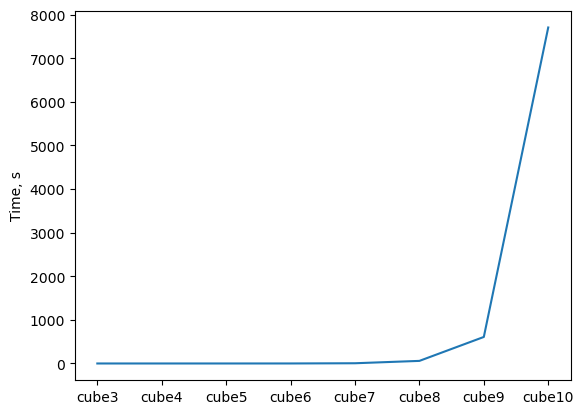

In [14]:
# import matplotlib.pyplot as plt

# plot_names = [cube[1] for cube in fenum_cubes]

# plt.plot(plot_names, cube_times)
# plt.ylabel('Time, s')
# plt.show()

In [5]:
#simplex experiment

# simplex_dir = Path(experiment_jsons / 'simplex')
# fenum_simplex = []

# for sim in simplex_dir.iterdir():
#     cb_im, cb_data = read_polymake_format(sim)
#     fenum_simplex.append((FaceEnumeration(cb_im, cb_data), sim.stem))

# fenum_simplex = sorted(fenum_simplex, key=lambda x : x[0].get_dim)

# cube_times = []
# for sim in fenum_simplex:
    
#     start = time.time()
#     sim[0].face_enumeration()
#     tm = time.time() - start
#     cube_times.append(tm)

In [4]:
import matplotlib.pyplot as plt

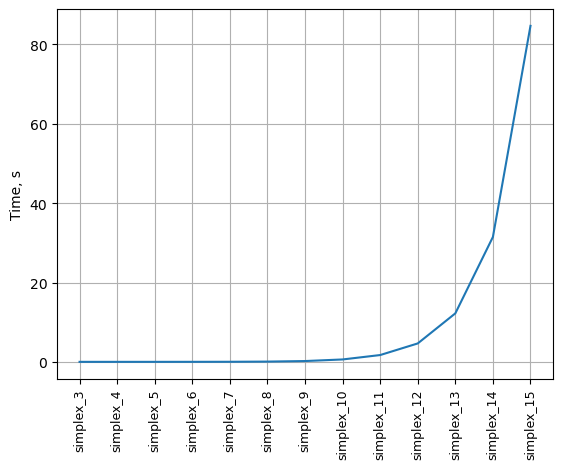

In [8]:
# plot_names = [sim[1] for sim in fenum_simplex]

# plt.plot(plot_names, cube_times)
# plt.xticks(rotation = 90)
# plt.ylabel('Time, s')
# plt.tick_params(axis='x', which='major', labelsize=9)
# plt.grid(True)
# plt.show()

In [14]:
#cyclic poly dinension experiment

cyc_dir = Path(experiment_jsons / 'cyclic_poly_dim')
fenum_cyc_dim = []

for sim in cyc_dir.iterdir():
    cb_im, cb_data = read_polymake_format(sim)
    fenum_cyc_dim.append((FaceEnumeration(cb_im, cb_data), sim.stem))

fenum_cyc_dim = sorted(fenum_cyc_dim, key=lambda x : x[0].get_dim)


In [22]:
def face_enumer(poly_data):
    polytope = FaceEnumeration(poly_data[0], poly_data[1])
    print(poly_data[2])
    start = time.time()
    polytope.face_enumeration()
    tm = time.time() - start

    return poly_data[2], tm

In [31]:
from multiprocessing import Pool

poly_data = []

for sim in cyc_dir.iterdir():
    cb_im, cb_data = read_polymake_format(sim)
    poly_data.append((cb_im, cb_data, sim.stem))

poly_times = []
with Pool() as pool:
    res = pool.map(face_enumer, poly_data)
    poly_times.append(res)

cyclic_prod_6_15
cyclic_prod_4_15cyclic_prod_5_15



In [30]:
poly_times

[[('cyclic_prod_2_15', 34.36413335800171),
  ('cyclic_prod_3_15', 3159.810598373413)]]

In [27]:
poly_times

In [17]:
def face_enumer(polys):
    cyc_times = []
    for sim in polys:
        print(sim[1])
        start = time.time()
        sim[0].face_enumeration()
        tm = time.time() - start
        cyc_times.append((tm, sim[1], sim[0].get_dim))

    return cyc_times

In [ ]:
plot_names = [sim[1] for sim in fenum_cyc_dim]

plt.plot(plot_names, poly_times)
plt.xticks(rotation = 90)
plt.ylabel('Time, s')
plt.tick_params(axis='x', which='major', labelsize=9)
plt.grid(True)
plt.show()